In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings


In [8]:
from keras.datasets import mnist 
#import tensorflow as tf
(x_train ,y_train),(x_test,y_test) = mnist.load_data()

5


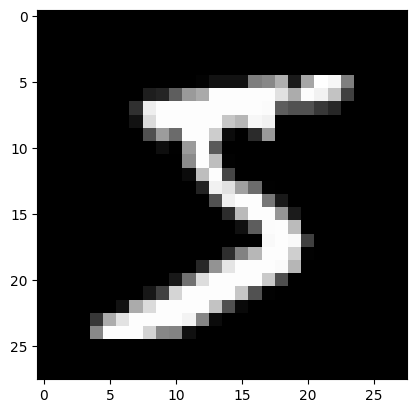

In [9]:
#display 
print(y_train[0])
plt.imshow(x_train[0],cmap='gray')

In [10]:
# chuan hoa input
x_train_scaled = np.array([x.ravel()/255. for x in x_train ])
x_test_scaled = np.array([x.ravel()/255. for x in x_test ])

x_train_scaled.shape,x_test_scaled.shape


((60000, 784), (10000, 784))

Normalize Output


In [11]:
# One hot encoding function
def one_hot_encode(y):
    y_unique = np.unique(y)
    '''
    extract unique data in array
    Ex :
    before unique : [3,5,3,1,4,6]
    after unique : [1,3,4,5,6]
    2'''
    y_one_hot = np.zeros((len(y),len(y_unique)))
    for i in range(len(y)):
        y_one_hot[i,y[i]] = 1
    return y_one_hot

In [12]:
y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)

In [17]:
 # Print shape after encoding
print(f"Before encoding : {y_train.shape}, {y_test.shape}")
print(f"After encoding : {y_train_one_hot.shape}, {y_test_one_hot.shape}")

Before encoding : (60000,), (10000,)
After encoding : (60000, 10), (10000, 10)


In [18]:
 # Show some change in value
print(y_train[0])
print(y_train_one_hot[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [19]:
print(y_train[0:10])
print(y_train_one_hot[0:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Build and Train Model 

Softmax function 

In [20]:
def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=1,keepdims=True))

Predict function 

In [21]:
def predict(X,w):
  z = np.dot(X,w)
  return softmax(z)

Loss function

In [22]:
def loss(X,y,w):
  y_pred = predict(X,w)
  return -np.sum(y*np.log(y_pred))/y.shape[0]


Loss Derivative function 

In [27]:
def grad(X,y,w):
  y_pred = predict(X,w)
  delta = y_pred-y 
  return np.dot(X.T,delta) / X.shape[0]


Gradient Descent(full batch)

In [24]:
def gradient_descent(X, y, lr=0.01, epoch=100):
    w = np.zeros((X.shape[1], y.shape[1]))
    historis = []
    for i in range(epoch):
        dw = grad(X, y, w)
        w = w - lr*dw
        historis.append(loss(X, y, w))
    print(f'Loss Cross Entropy : {loss(X, y, w)}')
    return historis, w

Gradient Descent(Mini Batch)

In [25]:
def mini_batch_sgd(X,y,lr = 0.01 , batch_size = 64,epochs=1000):
    w = np.zeros((X.shape[1],y.shape[1]))
    historis = []
    for i in range(epochs):
        idx = np.random.choice(X.shape[0],batch_size,replace=False)
        X_batch = X[idx]
        y_batch = y[idx]
        dw = grad(X_batch,y_batch,w) / batch_size
        w = w-lr*dw
        historis.append(loss(X_batch,y_batch,w))
    print("Loss Cross Entropy : " ,loss(X_batch,y_batch,w))
    return historis,w

Train Full Batch

In [28]:
loss_full, w_full = gradient_descent(x_train_scaled, y_train_one_hot,lr = 0.01,epoch=1000)

Loss Cross Entropy : 0.6121305167099463


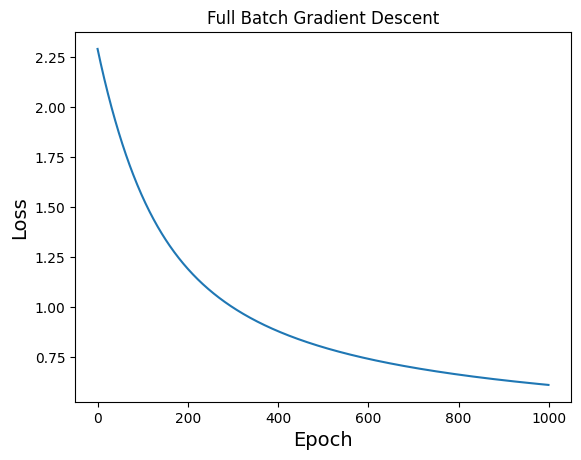

In [29]:
plt.plot(loss_full)
plt.title("Full Batch Gradient Descent")
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.show()

Train with Mini Batch

In [30]:
loss_mini,w_mini = mini_batch_sgd(x_train_scaled,y_train_one_hot)

Loss Cross Entropy :  2.02451287418741


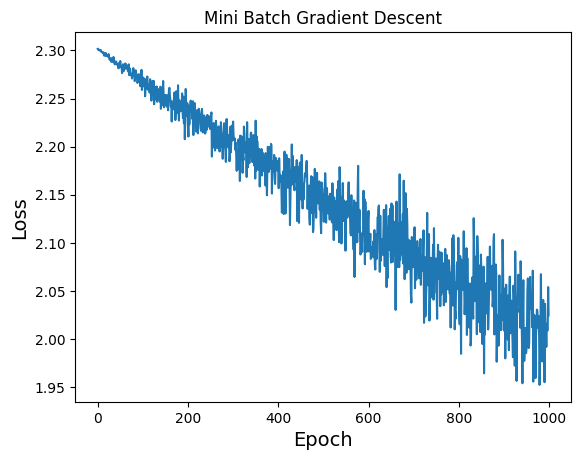

In [31]:
plt.plot(loss_mini)
plt.title("Mini Batch Gradient Descent")
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.show()

4 . Ex 1 : Evaluate

In [32]:
def predict_classes(X,w):
  y_pred = predict(X,w)
  y_pred = np.argmax(y_pred,axis=1)
  return y_pred

In [35]:
def evaluate(y_true, y_pred):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(y_true)):
        if(y_true[i] == y_pred[i]):
            if(y_pred[i] == 1):
                tp += 1
            else:
                tn += 1
        else:
            if(y_pred[i] == 1):
                fp += 1
            else:
                fn += 1
    accuracy = (tp + tn) / (tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*accuracy/(precision+accuracy)
    print("Accuracy : ",accuracy)
    print("Precision : ",precision)
    print("Recall : ",recall)
    print("f1_score : ",f1_score)
    

Mini Batch

In [36]:
y_pred = predict_classes(x_train_scaled,w_full)
evaluate(y_train,y_pred)

Accuracy :  0.8605
Precision :  0.8645777299623454
Recall :  0.4661397911832947
f1_score :  0.8625340455225022


Full Batch

In [37]:
y_pred = predict_classes(x_test_scaled,w_full)
evaluate(y_test,y_pred)

Accuracy :  0.87
Precision :  0.9069767441860465
Recall :  0.4789473684210526
f1_score :  0.8881036513545347


5 Ex2 : Class "LogisticRegression"

In [38]:
class LogisticRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
    def softmax(self, z):
        return np.exp(z)/np.sum(np.exp(z), axis=1, keepdims=True)
    def predict(self, X, w):
        z = np.dot(X, w)
        return self.softmax(z)
    def loss(self, X, y, w):
        y_hat = self.predict(X, w)
        return -np.sum(y*np.log(y_hat))/y.shape[0]
    def grad(self, X, y, w):
        y_hat = self.predict(X, w)
        dw = np.dot(X.T, y_hat-y) / X.shape[0]
        return dw
    def gradient_descent(self, X, y):
        w = np.zeros((X.shape[1], y.shape[1]))
        historis = []
        for i in range(self.epochs):
            w = w - self.lr*self.grad(X, y, w)
            historis.append(self.loss(X, y, w))
        print(f"Loss Cross Entropy : {self.loss(X, y, w)}")
        return historis, w

Creat Model

In [39]:
model = LogisticRegression()

In [40]:
l_model, w_model = model.gradient_descent(x_train_scaled, y_train_one_hot)

Loss Cross Entropy : 0.6121305167099463


Evaluate

In [41]:
y_pred = predict_classes(x_test_scaled,w_model)
evaluate(y_test,y_pred)

Accuracy :  0.87
Precision :  0.9069767441860465
Recall :  0.4789473684210526
f1_score :  0.8881036513545347


Ex3 : Class "LogisticRegression_v2"

In [42]:
class LogisticRegression_v2:
    def __init__(self, lr=0.01, epochs=1000, add_bias=True):
        self.lr = lr
        self.epochs = epochs
        self.add_bias = add_bias
    def addBias(self, X):
        return np.hstack((np.ones((X.shape[0], 1)), X))
    def softmax(self, z):
        return np.exp(z)/np.sum(np.exp(z), axis=1, keepdims=True)
    def predict(self, X, w):
        z = np.dot(X, w)
        return self.softmax(z)
    def loss(self, X, y, w):
        y_hat = self.predict(X, w)
        return -np.sum(y*np.log(y_hat))/y.shape[0]
    def grad(self, X, y, w):
        y_hat = self.predict(X, w)
        dw = np.dot(X.T, y_hat-y) / X.shape[0]
        return dw
    def gradient_descent(self, X, y):
        if self.add_bias:
            X = self.addBias(X)
        w = np.zeros((X.shape[1], y.shape[1]))
        loss_hist = []
        for i in range(self.epochs):
            w = w - self.lr*self.grad(X, y, w)
            loss_hist.append(self.loss(X, y, w))
        print(f"Loss Cross Entropy : {self.loss(X, y, w)}")
        return loss_hist, w